# Reconocimiento de Palabras en Lenguaje de Señas



El Machine Learning es una herramienta que ha abierto una cantidad gigantesca de nuevas posibilidades en todas las áreas de investigación y desarrollo de tecnología, en las que son los datos quienes ayudan a describir la realidad y entender su funcionamiento. Por otro lado, en la actualidad, la brecha que ha marginado a las personas con habilidades especiales cada vez se va reduciendo, aumentando sus posibilidades y brindandoles una inserción a la sociedad más sencilla y justa. De esta manera, mediante el uso de un dispositivo electrónico embebido en un guante, diseñado en la USFQ para medir 11 señales en cada movimiento que se realiza con la mano, se desarrolla un modelo de ML que permite clasificar cada set de datos tomados con el guante de modo que se pueda reconocer los gestos que una persona pueda realizar en lenguaje de señas. De esta manera, este proyecto apoya al desarrollo de proyectos dentro de la USFQ que permiten la inserción de personas con discapacidades a la sociedad brindando a la academia un acercamiento a una solución.

Por otro lado, el dataset utilizado consta de 21 gestos en lenguaje de señas con aproximadamente 20 ejemplos de cada uno, dando un total de 448 muestras. Las features usadas provienen de medidas estadísticas como media, desviación estándar y curtosis aplicadas a las señales que cada gesto generó.

Finalmente, es importante tomar en cuenta que las señales que se toman con el guante evolucionan en el tiempo, por lo que la solución ideal sería trabajar con modelos de ML que manejen este tipo de datos; sin embargo, el modelo presentado unicamente clasifica los gestos.


# Librerías


1.   ***train_test_split:*** permite dividir el data set en training, validation, y test sets.  
2.   ***RepeatedStratifiedKFold y RepeatedKFold:*** permite realizar el proceso de K-Fold Cross Validation, es decir, tomar un conjunto de validación del training set.
3.   ***GridSearchCV:*** librería para probar varios parámetros en el modelo y encontrar el que tiene el mejor resultado.
4.   ***StandarScaler:*** Permite colocar los valores de los features en un rango entre 0 y 1 para que todas las features tengan un mismo peso para el modelo.
5.   ***LogisticRegression:*** permite utilizar un modelo de ML basado en los principios de la regresión logística.
6.   ***Pipeline:*** librería que ayuda a designar un proceso a seguir especificando cada paso, y las características que tendrá el mismo. Permite crear un código más ordenado y legible.
7.   ***metrics:*** implementación de Python para calcular varias métricas para evaluar el desempeño de un modelo de ML. En este proyecto se usa la métrica accuracy en las predicciones realizadas.
8.   ***LabelEnconder:*** [1] permite codificar cada label del modelo con un número desde 0 hasta n-1 labels.
9.   ***PolynomialFeautres:*** implementa una búsqueda de la mejor combinación de las features de orden n para poder clasificar cada una de las clases que existen.
10.   ***TSNE:*** [2] técnica para reducir la dimensinalidad de los datos, de modo que puedan ser graficados y observados para tener una mejor idea de su distribución.
11.   ***matplotlib.pyplot:*** librería de Python para realizar gráficos.
12.   ***LinearSVC:*** [3] librería que implementa un clasificador para datos que pueden ser, aproximadamente, divididos de manera lineal (SVC: Super Vector Classifier). Este modelo de ML pertence a la familia de SVM. En este caso, se usó para encontrar las features mas importantes del dataset.
13.   ***SelectFromModel:*** [4] librería para seleccionar ciertas features que un modelo determinó como importantes, y aplicarlas a otro.
14.   ***KNeighborsClassifier:*** [5] implementación del Python del modelo de ML de k-NN.
15.   ***pandas:*** librería de Python para el manejo de dataframes.
16.   ***numpy:*** librería de Python para el manejo de datos en matrices y vectores.





In [ ]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder # [1]
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.manifold import TSNE # [2]
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC # [3]
from sklearn.feature_selection import SelectFromModel # [4]
from sklearn.neighbors import KNeighborsClassifier # [5]
import pandas as pd
import numpy as np

In [ ]:
# Lectura del dataset
enlace = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSmAcOOPfBMiStMXnhptp7BLAuTXYPej7HVfKWw5Q7p4B5TQUdhHTS8W3Vdh2cQlP0KOtl_pnlloCj6/pub?output=csv'
df = pd.read_csv(enlace)
df.head()

,AccX Mean,AccY Mean,AccZ Mean,GX Mean,GY Mean,GZ Mean,Pulgar Mean,Indice Mean,Medio Mean,Anular Mean,...,AccZ Kurt,GX Kurt,GY Kurt,GZ Kurt,Pulgar Kurt,Indice Kurt,Medio Kurt,Anular Kurt,Meñique Kurt,Gesture
0,0.419541,-0.313123,0.943043,-6.745902,2.677905,-3.406133,803.951096,775.006136,842.086439,843.461337,...,-0.475041,-0.074314,0.540636,-0.149341,-1.180415,11.478256,-1.638934,-1.632177,-1.599026,one
1,0.334948,-0.244175,0.862880,9.186971,6.620958,-3.607931,801.400200,770.061156,844.741068,843.045844,...,0.350746,1.570401,1.741921,1.274650,-1.184921,10.925931,-1.663711,-1.656164,-1.617013,one
2,0.273698,-0.183781,0.825925,-1.174391,-0.391651,4.759020,802.821652,769.238896,835.079125,836.984969,...,1.249956,0.913655,1.690965,1.771544,-0.875997,0.422510,-1.429115,-1.435107,-1.436135,one
3,0.270445,-0.173829,0.823121,10.760722,8.958593,-6.006973,796.770506,767.821004,828.886930,830.291299,...,1.041925,1.388053,2.148753,2.439008,0.099173,-0.382494,-0.798231,-0.724489,-0.696481,one
4,0.298925,-0.213749,0.828197,3.555168,4.838285,-7.567480,805.642471,766.950830,837.685016,837.254712,...,1.010203,0.353251,1.255423,0.083606,-0.889092,-0.363202,-1.597183,-1.590546,-1.584056,one


In [ ]:
df.describe()

,AccX Mean,AccY Mean,AccZ Mean,GX Mean,GY Mean,GZ Mean,Pulgar Mean,Indice Mean,Medio Mean,Anular Mean,...,AccY Kurt,AccZ Kurt,GX Kurt,GY Kurt,GZ Kurt,Pulgar Kurt,Indice Kurt,Medio Kurt,Anular Kurt,Meñique Kurt
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,0.344840,-0.181331,0.846118,-4.864734,1.856484,3.142338,795.107487,790.244863,800.058249,813.647493,...,0.241712,1.185148,1.549120,1.092450,0.561576,0.828946,4.687985,2.513378,1.180676,0.569085
std,0.202114,0.136438,0.184555,8.178183,9.558257,10.544292,20.469563,23.294589,19.098712,23.261062,...,1.537468,3.302081,1.497443,1.631444,1.293923,4.388419,20.813828,8.805350,3.960778,3.177825
min,-0.102776,-0.591392,0.314066,-39.835849,-22.482463,-36.421864,758.314293,762.487209,780.835097,785.840172,...,-1.741086,-1.704483,-0.913155,-1.034383,-1.423762,-1.940607,-1.908601,-1.900089,-1.891151,-1.891193
25%,0.126902,-0.258643,0.719865,-9.270607,-3.578228,-1.944040,779.320618,771.332660,785.460629,793.159328,...,-0.763786,-0.429954,0.533479,-0.050903,-0.061449,-1.154669,-1.047893,-1.178116,-1.335794,-1.344752
50%,0.396660,-0.166260,0.880238,-4.559084,1.163094,1.268743,795.222592,783.329668,791.496554,807.889971,...,0.016341,0.258209,1.216256,0.592968,0.436273,-0.556865,-0.217615,0.190627,-0.035879,-0.319300
75%,0.516325,-0.074729,0.971460,-0.396062,5.723289,6.226064,810.962338,805.084622,810.551225,830.926166,...,0.806387,1.304972,2.296427,1.781035,0.955465,0.796347,1.725914,2.322480,1.910970,1.202487
max,0.744516,0.071106,1.257611,39.903906,78.481489,40.619982,843.071613,874.309793,854.744963,872.556305,...,11.698770,30.202594,9.011382,9.427302,13.564705,35.721898,253.115350,122.068344,30.402062,22.330449


# Separar Data Set

In [ ]:
# Cargar datos desde el archivo CSV
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSmAcOOPfBMiStMXnhptp7BLAuTXYPej7HVfKWw5Q7p4B5TQUdhHTS8W3Vdh2cQlP0KOtl_pnlloCj6/pub?output=csv')
label_encoder = LabelEncoder()

# Codificar las etiquetas en la columna 'gesture'
data['Gesture_encoded'] = label_encoder.fit_transform(data['Gesture'])

# Separar características (X) y etiquetas codificadas (y)
X = data.drop(['Gesture', 'Gesture_encoded'], axis=1)  # Excluir las columnas originales y la columna codificada
y = data['Gesture_encoded']

print("Clases asignadas a números:", label_encoder.classes_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2



Clases asignadas a números: ['chao' 'como' 'comoestas' 'cual' 'cuantos' 'dias' 'donde' 'hola' 'lay'
 'lenguadeseñas' 'medio' 'meñique' 'mi' 'noche' 'one' 'paz' 'prsn'
 'prsnt' 'respuesta' 'tarde' 'tepresento' 'xq']


# Regresión Logística

In [ ]:
# Configuración de repeated k-fold Cross Validation
rkf = RepeatedKFold(n_splits=2, n_repeats=5, random_state=45)  # Número de particiones y repeticiones

# Pipeline
pipeline_log_reg = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l2", dual=False, multi_class='ovr'))),
    ('logistic_reg', LogisticRegression(max_iter=20000, solver='saga'))
])

lambda_range = [1e-4, 1e-3, 1e-2, 0.1]
C_range = [1 / (lambda_value) for lambda_value in lambda_range]  # Transforma al inverso de lambda
param_grid = {'logistic_reg__C': C_range,
              'logistic_reg__penalty': ['l2', 'l1']}

# Grid Search Cross Validation con RepeatedKFold
search = GridSearchCV(pipeline_log_reg, param_grid, scoring='recall_micro', cv=rkf, verbose=4)
result = search.fit(X_train, y_train)

# Resultados de la búsqueda
print(f'Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}')

# Reentrenamiento con los mejores parámetros
pipeline_log_reg.set_params(logistic_reg__C=result.best_params_['logistic_reg__C'],
                            logistic_reg__penalty=result.best_params_['logistic_reg__penalty'])
pipeline_log_reg.fit(X_train, y_train)

#evaluamos en el conjunto de test
pred_test = pipeline_log_reg.predict(X_test)
acc = metrics.accuracy_score(y_test, pred_test)

print("Para el modelo optimizado, métricas en el conjunto de test: acc = ", acc,)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.933 total time=   0.8s
[CV 2/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.985 total time=   1.1s
[CV 3/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.985 total time=   2.3s
[CV 4/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.993 total time=   1.7s
[CV 5/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.978 total time=   2.1s
[CV 6/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.993 total time=   2.7s
[CV 7/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.955 total time=   4.2s
[CV 8/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.978 total time=   2.1s
[CV 9/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;, score=0.978 total time=   2.8s
[CV 10/10] END logistic_reg__C=10000.0, logistic_reg__penalty=l2;,

# TSNE

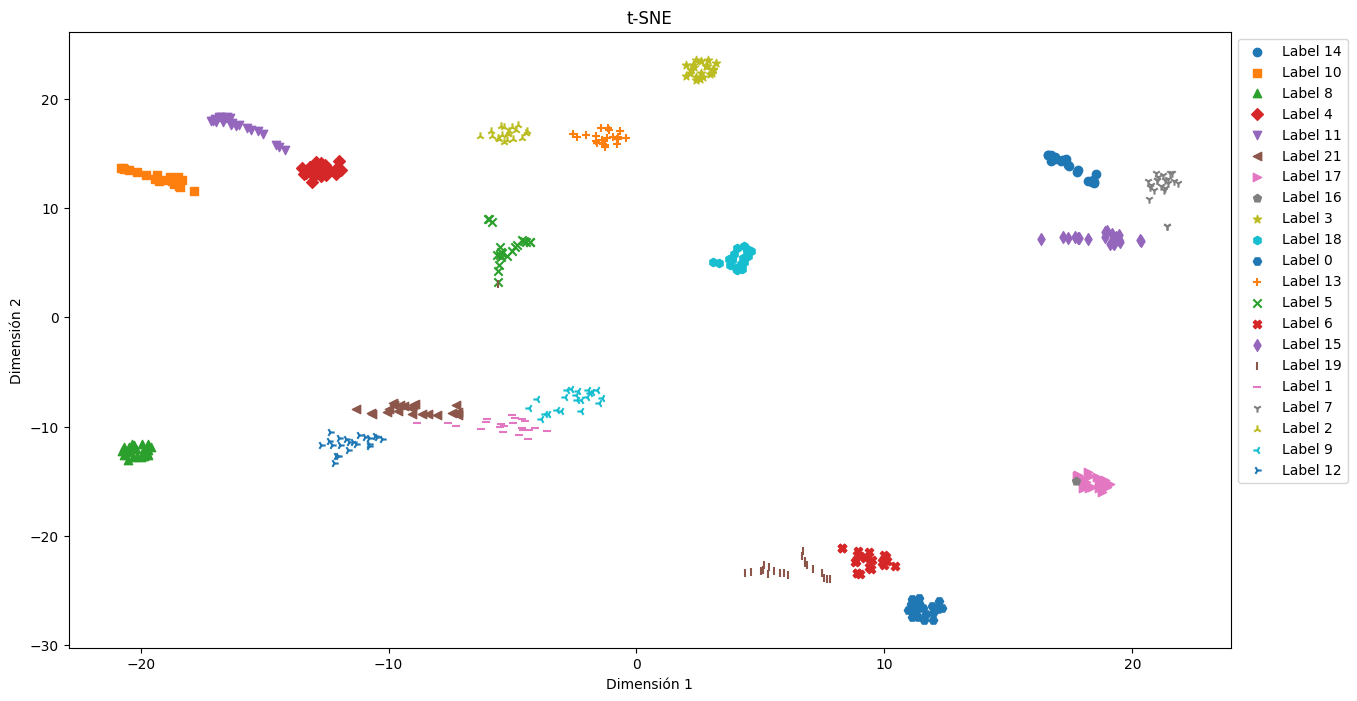

In [ ]:
# Fit t-SNE en training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X)

#DataFrame para t-SNE
tsne_df = pd.DataFrame(data=X_train_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Label'] = y

# Lista de marcadores (puedes agregar más si es necesario)
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_', '1', '2', '3','4']

# Graficar cada grupo con un marcador diferente
plt.figure(figsize=(15, 8))
for idx, (label, marker) in enumerate(zip(tsne_df['Label'].unique(), markers)):
    subset = tsne_df[tsne_df['Label'] == label]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], marker=marker,label=f'Label {label}')
# Colocar la leyenda fuera del gráfico, a la derecha
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("t-SNE")
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()



# KNN

In [ ]:
# Proceso de K-fols cross validation
kfold = RepeatedKFold(n_splits=2, n_repeats=5, random_state=45)

# Pipeline
model_knn = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l2", dual=False, multi_class='ovr'))),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=21))
])

# Define parámetros para GridSearchCV
param_grid = {
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': np.logspace(0, 2, 20, dtype=int),  # Valores logarítmicos entre 1 y 100
    'knn__metric': ['euclidean', 'manhattan', 'cosine']
}

# Configuración de GridSearchCV
search = GridSearchCV(model_knn, param_grid, scoring='recall_micro', cv=kfold, verbose=4)
result = search.fit(X_train, y_train)

print(f'Mejor recall en el conjunto de validación: {result.best_score_} para {result.best_params_}')

# Reentrenar con los mejores parámetros
model_knn.set_params(**result.best_params_)
model_knn.fit(X_train, y_train)  # Entrenar el modelo usando el pipeline

# Evaluación en el conjunto de prueba
pred_test = model_knn.predict(X_test)

acc = metrics.accuracy_score(y_test, pred_test)

print(f"Para el modelo optimizado, métricas en el conjunto de prueba: Accuracy = {acc}")

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.858 total time=   0.3s
[CV 2/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.933 total time=   0.3s
[CV 3/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.940 total time=   0.4s
[CV 4/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.955 total time=   0.2s
[CV 5/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.925 total time=   0.2s
[CV 6/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.933 total time=   0.3s
[CV 7/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.925 total time=   0.3s
[CV 8/10] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.940 total time=   0.3s
[CV 9/10] END knn__metric=euclidean, knn__n_nei

# P-Value

In [ ]:
from sklearn.model_selection import cross_val_score

validation_scores = cross_val_score(model, X, y, cv=kf)

### ***Conclusiones***

La conclusión más importante es el valor del 98.89% de accuracy que se obtuvo utilizando los modelos de Regresión Logística y kNN. Este valor conlleva a pensar que el modelo es extremadamente bueno para el dataset usado, es decir, que los datos son facilmente separables, lo que se puede observar en el gráfico realizado utilizando t-SNE; o la otra posibilidad es que se tenga un problema de overfitting a los datos. Esta segunda conclusión nace al conocer la fuente de la que provienen los datos, ya que todos ellos fueron tomados por una única persona, por lo que la variabilidad que cada persona puede aportar a los datos se ve reducida completamente al existir una única generando los datos, lo que puede indicar que el modelo funciona muy bien unicamente para dicha persona, pero para el resto puede fallar. Además, se debe tener en cuenta también que se tiene aproximadamente 20 muestras de cada gesto, lo que es una cantidad baja, y luego de hacer una divisón para los datos de entrenamiento, validación y prueba se obtienen 12, 4 y 4 muestras respectivamente. Este problema puede hacer que el modelo no se entrene de la mejor manera.

Por otro lado, se utiliza la métrica accuracy para medir el desempeño del modelo ya que los datos que se tienen están balanceados, es decir, existe la misma cantidad de muestras de cada clase. Además, en este caso, el no predecir de forma correcta un gesto no tiene consecuencias muy graves en el uso del modelo.

Otro punto importante es que durante el entrenamiento del modelo, hubo ocasiones en las que el accuracy en el conjunto de prueba tenía un valor de 1, lo cual indica que el modelo no se equivoca, pero, como se mencionó anteriormente, esto puede ser un caso de overfitting, además de que es mejor tener una métrica que indica que puede haber errores aún cuando dificilmente los habrá, ya que así nos aseguramos de que cualquier error puede ser explicado por el mismo modelo, y la oportunidad de mejorarlo queda siempre abierta.

### ***Bibliografía***
[1] scikit-learn. “sklearn.preprocessing.LabelEncoder”. scikit-learn. Accedido el 11 de diciembre de 2023. [En línea]. Disponible: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

[2] scikit-learn. “sklearn.manifold.TSNE”. scikit-learn. Accedido el 11 de diciembre de 2023. [En línea]. Disponible: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

[3] scikit-learn. “sklearn.svm.LinearSVC”. scikit-learn. Accedido el 11 de diciembre de 2023. [En línea]. Disponible: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

[4] scikit-learn. “sklearn.feature_selection.SelectFromModel”. scikit-learn. Accedido el 11 de diciembre de 2023. [En línea]. Disponible: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel

[5] scikit-learn. “sklearn.neighbors.KNeighborsClassifier”. scikit-learn. Accedido el 11 de diciembre de 2023. [En línea]. Disponible: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

